# Hello World

### DATA SCIENCE WOrkSHOP DAY 2

# Linear Regression

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Load the dataset
Link: https://www.kaggle.com/harlfoxem/housesalesprediction/download

In [7]:
houses = pd.read_csv("C:/Users/HP/Desktop/find-him/dataset/kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#check for nulls in the data
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

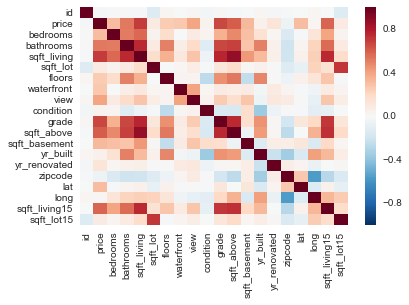

In [9]:
# check for any correlations between variables
corr = houses.corr()
sns.heatmap(corr)
# sqft_living, grade, sqft_above and sqft_living15 seem to have a 
# high influence in price

In [10]:
# create x and y
feature_cols = 'sqft_living' 
x = houses[feature_cols] # predictor
y = houses.price # response

In [13]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
# the test set will be 20% of the whole data set

In [19]:
len(x_train),len(y_train)
x_train.reshape(-1,1)
y_train.reshape(-1,1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[745000.],
       [775000.],
       [188000.],
       ...,
       [329000.],
       [365000.],
       [306000.]])

In [27]:
# instantiate, fit
linreg = LinearRegression()
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
linreg.fit(x_train.values, y_train.values)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 17290]

In [31]:
# data=data.reshape((999,1)) 
# reference:https://stackoverflow.com/questions/30813044/sklearn-found-arrays-with-inconsistent-numbers-of-samples-when-calling-linearre
x_train = x_train.reshape((len(x_train),1))
y_train = y_train.reshape((len(x_train),1))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print (linreg.intercept_)
print (linreg.coef_)
# -41495.36323679
# [279.63387551] # for an increase of 1 square meter in house size,
# # the house price will go up by ~$282, on average

[-41495.36323679]
[[279.63387551]]


In [37]:
# manually
#price = -41495.36323679 + 1000*279.63387551
# using the model
linreg.predict(1000)
# array([ 238138.51227745])

array([[238138.51227745]])